<a href="https://colab.research.google.com/github/rgspatial/Practicing/blob/main/HypernetX_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install hypernetx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 89 kB 3.5 MB/s 
     |████████████████████████████████| 3.2 MB 27.9 MB/s 
  Created wheel for python-igraph: filename=python_igraph-0.10.1-py3-none-any.whl size=9076 sha256=19d14f05b01171c6648cc2d9344ff8e43e3b5715397019c9ffdb48467a298d33
  Stored in directory: /root/.cache/pip/wheels/e2/79/c8/573c0f4e408a66ae133c1aa73c01824cfac9564b6e2b5288e3
Successfully built python-igraph
  Attempting uninstall: decorator
    Found existing installation: decorator 4.4.2
    Uninstalling decorator-4.4.2:
      Successfully uninstalled decorator-4.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
moviepy 0.2.3.5 requires decorator<5.0,>=4.0.2, but you have decorator 5.1.1 which is

In [2]:
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import os, json
import numpy as np
import pandas as pd

from networkx.drawing import spring_layout
import hypernetx as hnx

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# We start with a list of scenes, and construct a hypergraph by converting this to a dictionary.

scenes = [
    ('FN', 'TH'),
    ('TH', 'JV'),
    ('BM', 'FN', 'JA'),
    ('JV', 'JU', 'CH', 'BM'),
    ('JU', 'CH', 'BR', 'CN', 'CC', 'JV', 'BM'),
    ('TH', 'GP'),
    ('GP', 'MP'),
    ('MA', 'GP')
]

H = hnx.Hypergraph(dict(enumerate(scenes)))
H.edges.incidence_dict

{0: {'FN', 'TH'},
 1: {'JV', 'TH'},
 2: {'BM', 'FN', 'JA'},
 3: {'BM', 'CH', 'JU', 'JV'},
 4: {'BM', 'BR', 'CC', 'CH', 'CN', 'JU', 'JV'},
 5: {'GP', 'TH'},
 6: {'GP', 'MP'},
 7: {'GP', 'MA'}}

In [5]:
H.dual().edges.incidence_dict

{'TH': {0, 1, 5},
 'FN': {0, 2},
 'JV': {1, 3, 4},
 'JA': {2},
 'BM': {2, 3, 4},
 'CH': {3, 4},
 'JU': {3, 4},
 'BR': {4},
 'CC': {4},
 'CN': {4},
 'GP': {5, 6, 7},
 'MP': {6},
 'MA': {7}}

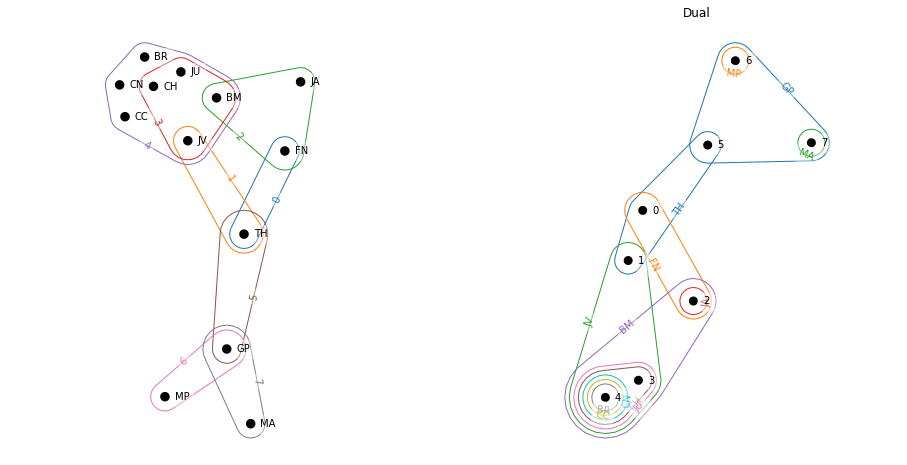

In [6]:
# Use the default drawing tool to visualize H and its dual.

plt.figure(figsize=(16, 8))
hnx.draw(H, ax=plt.subplot(121))
hnx.draw(H.dual(), ax=plt.subplot(122))
plt.title('Dual');

In [7]:
# A book tour is a Series of Hypergraph's from Les Miserables indexed hierarchically by Volume and Book.

lesmis = hnx.LesMis()
lesmis.df_scenes

,Volume,Book,Chapter,Scene,Step,Characters
0,1,1,1,0,0,MY
1,1,1,1,0,0,NP
2,1,1,1,1,1,MY
3,1,1,1,1,1,MB
4,1,1,2,0,2,MY
...,...,...,...,...,...,...
857,5,9,4,1,400,MA
858,5,9,4,1,400,CO
859,5,9,5,0,401,JV
860,5,9,5,0,401,CO


In [8]:
lesmis.df_scenes.set_index(['Volume','Book'])[['Chapter','Characters']]


Chapter Characters
Volume Book                    
1      1           1         MY
       1           1         NP
       1           1         MY
       1           1         MB
       1           2         MY
...              ...        ...
5      9           4         MA
       9           4         CO
       9           5         JV
       9           5         CO
       9           5         MA

[862 rows x 2 columns]

In [9]:
book_tour_data = lesmis.book_tour_data
book_tour_data.head()

Volume  Book
1       1       (NP, MB, MY, ME, CL, MC, GE, CV, SN, GG)
        2           (MR, JL, MT, JV, MB, MY, ME, IS, PG)
        3               (LI, BL, FT, FA, FV, DA, FN, ZE)
        4                               (TM, TH, FN, CO)
        5               (JV, MY, JA, FF, VI, FN, MT, BM)
dtype: object

Draw one hypergraph for each of the {Volume x Book} pairs in Les Miserables. Volumes are rows and books are columns. Note an empty square in the grid indicates the volume either didn't contain the book with that index or the book was purely expository with no character interactions.

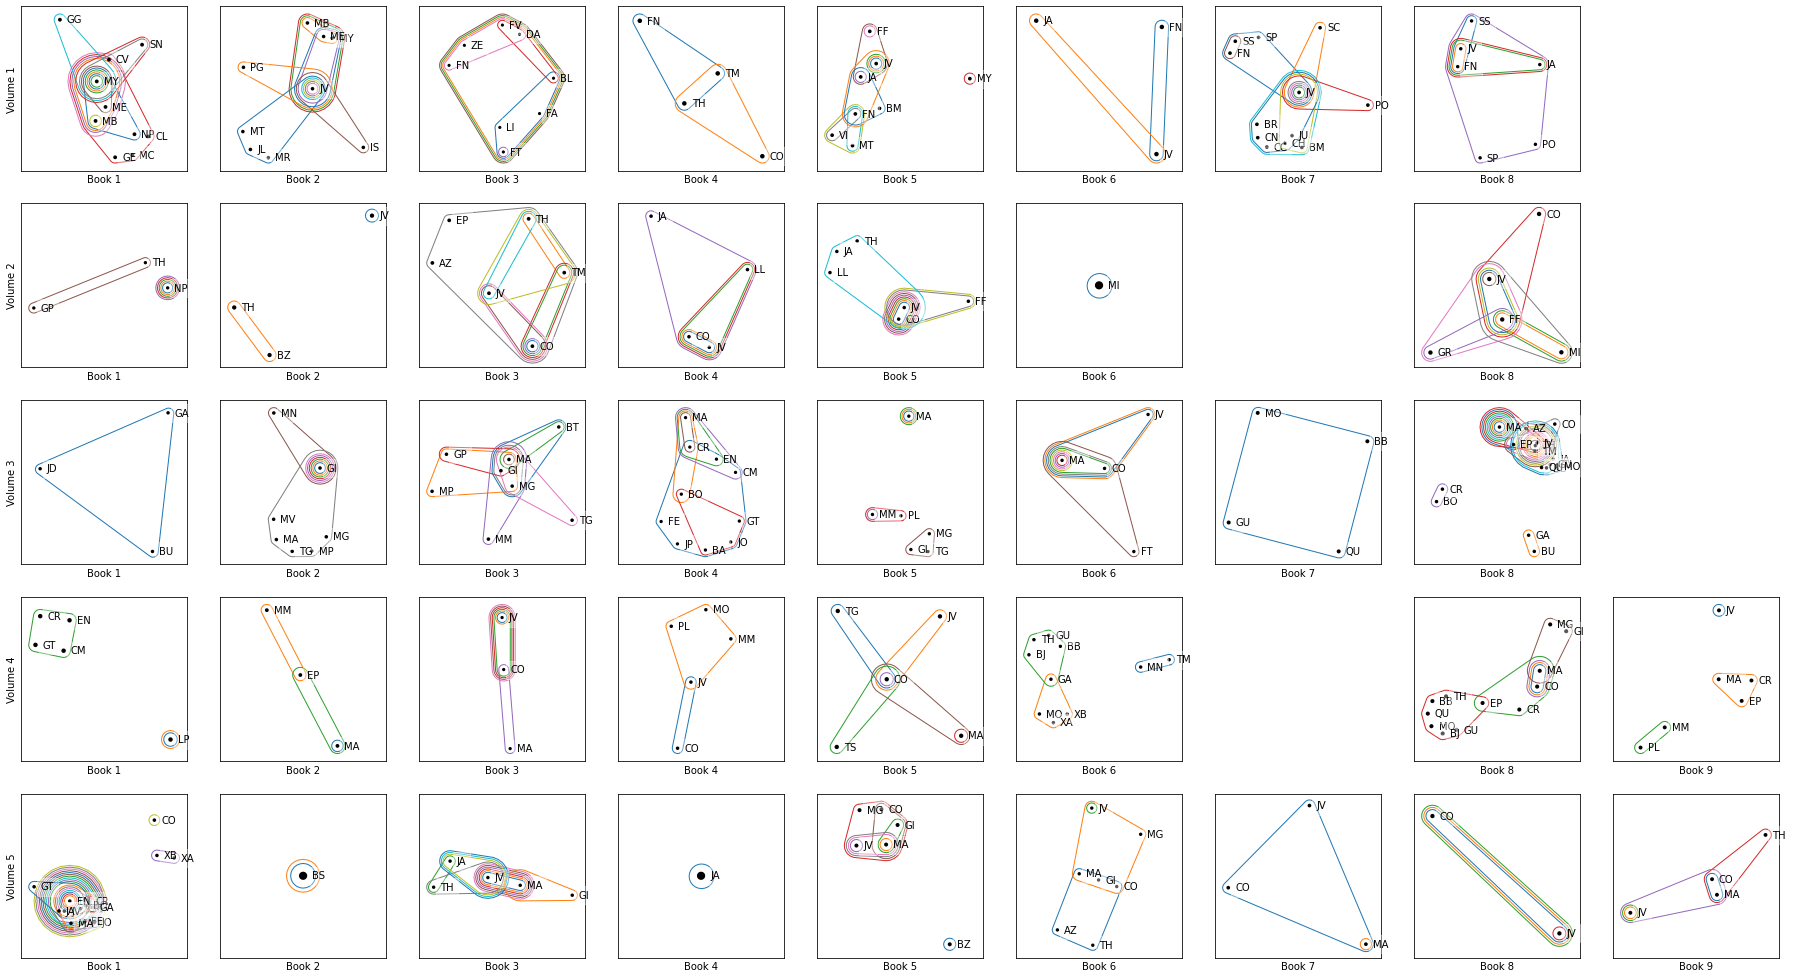

In [10]:
for t, Ht, ax in hnx.book_tour(book_tour_data):
    hnx.draw(Ht, layout=spring_layout, ax=ax, with_edge_counts=True)
    ax.axis('on')

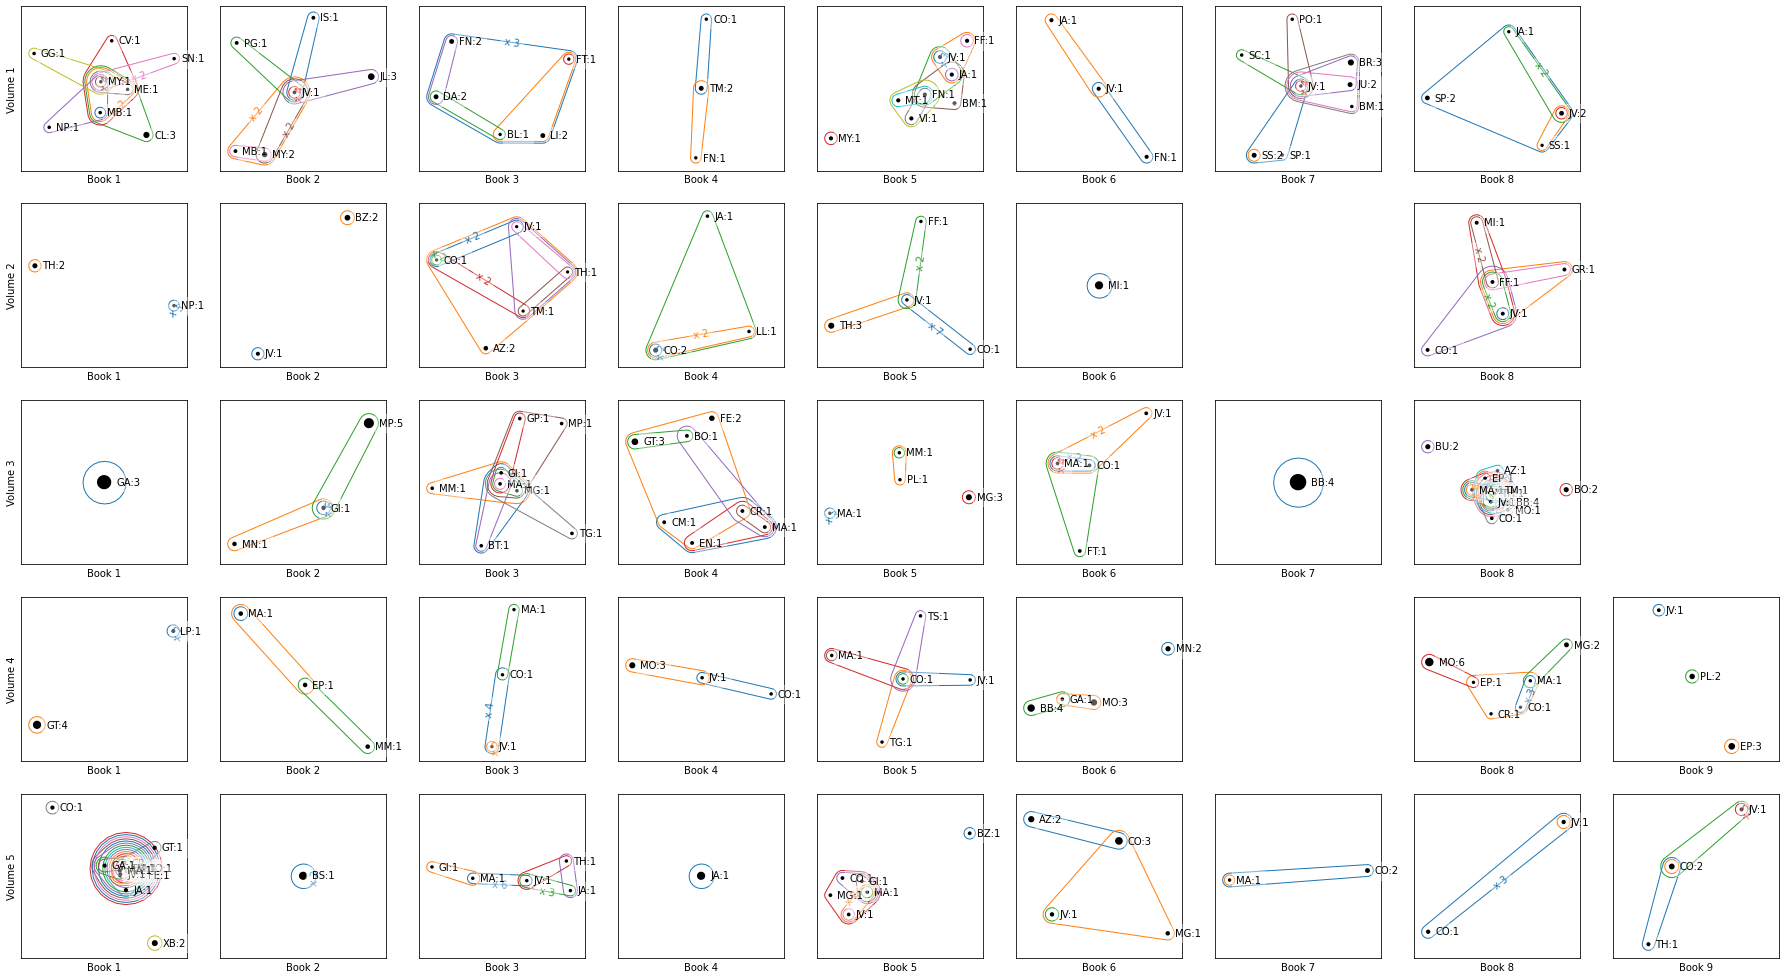

In [11]:
for t, Ht, ax in hnx.book_tour(book_tour_data):
    Ht = Ht.collapse_nodes_and_edges()
    hnx.draw(Ht, layout=spring_layout, ax=ax, with_edge_counts=True)
    ax.axis('on')